# Q: Is my 75+ grandpa in Olomouc or my grandpa in Prague in a bigger risk of dying from COVID-19?

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#questions" data-toc-modified-id="questions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>questions</a></span></li><li><span><a href="#explore-data" data-toc-modified-id="explore-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>explore data</a></span></li><li><span><a href="#extract-relevant-data" data-toc-modified-id="extract-relevant-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>extract relevant data</a></span></li><li><span><a href="#choose-both-cities-at-once" data-toc-modified-id="choose-both-cities-at-once-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>choose both cities at once</a></span></li><li><span><a href="#plot" data-toc-modified-id="plot-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>plot</a></span></li><li><span><a href="#only-75+" data-toc-modified-id="only-75+-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>only 75+</a></span></li><li><span><a href="#plot" data-toc-modified-id="plot-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>plot</a></span></li><li><span><a href="#adjust-by-population" data-toc-modified-id="adjust-by-population-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>adjust by population</a></span></li><li><span><a href="#plot-adjusted" data-toc-modified-id="plot-adjusted-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>plot adjusted</a></span></li><li><span><a href="#is-this-significant" data-toc-modified-id="is-this-significant-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>is this significant</a></span></li></ul></div>

## questions

**Q1: Where is he more likely to catch it? Answered: Equally likely in both cities! [previous notebook](00-part-1-grandpa-olomouc-prague-covid.ipynb)**<br>
**Q2: If he caught it, where are people of 75+ more frequently hospitalised? Answered: Equally likely in both cities. [previous notebook](00-part-2-grandpa-olomouc-prague-covid.ipynb)**<br>
**Q3: If hospitalised, where are people of 75+ more frequently dying? Cannot be answered due to few data points. [this notebook]**<br>
<br>
Need the following data:<br>
* number of people in O and in P *(got it)*
* incidence in O and in P per number of people in the city *(got it)*
* number of hospitalised 75+ people in Olomouc and in Prague *(cannot get)*
* number of hospitalised people in Olomouc and in Prague *(got it)*
* number of hospitalised deaths in 75+ people in Olomouc and in Prague *(got it)*
* number of deaths in 75+ people in Olomouc and in Prague *(got it)*

TO DO:<br>
* Find out and resolve SettingWithCopy *(done)*
* Find out lau versus orp for exact population and correct *(done)*
* What is the '_7' and its significance? *(done)*

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
# kod okresu
lau_Prg = 'CZ0100'
lau_Olo = 'CZ0712' 
# populace okresu
# http://www.kdekoliv.cz/okres.php?id_okres=CZ0100 1117063
# http://www.kdekoliv.cz/okres.php?id_okres=CZ0712 231742
pop_Prg = 1117063
pop_Olo = 231742

In [56]:
# dataset of 75+ Male deaths in regions but lacking whether death appeared in hospital
df_death = pd.read_csv('..\\00-source-data\\umrti.csv', delimiter=',')
df_death.tail()

,datum,vek,pohlavi,kraj_nuts_kod,okres_lau_kod
1026,2020-10-11,78,M,CZ080,CZ0803
1027,2020-10-11,78,M,CZ071,CZ0712
1028,2020-10-11,66,M,CZ064,CZ0644
1029,2020-10-11,92,Z,CZ010,CZ0100
1030,2020-10-11,65,Z,CZ080,CZ0801


## explore data

In [57]:
len(df_death)

1031

In [58]:
df_death.isnull().sum()

datum            0
vek              0
pohlavi          0
kraj_nuts_kod    0
okres_lau_kod    0
dtype: int64

In [59]:
df_death.dtypes

datum            object
vek               int64
pohlavi          object
kraj_nuts_kod    object
okres_lau_kod    object
dtype: object

In [60]:
df_death['datum'] = df_death['datum'].apply(pd.to_datetime)
df_death.dtypes

datum            datetime64[ns]
vek                       int64
pohlavi                  object
kraj_nuts_kod            object
okres_lau_kod            object
dtype: object

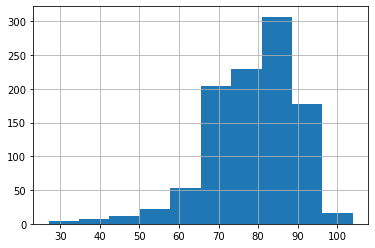

In [61]:
df_death['vek'].hist() 

In [62]:
df_death['kraj_nuts_kod'].nunique()

14

In [63]:
df_death['okres_lau_kod'].nunique()

74

## extract relevant data

In [64]:
df_death_col = df_death[['datum', 'vek', 'pohlavi', 'okres_lau_kod']].copy()
df_death_col.tail()

,datum,vek,pohlavi,okres_lau_kod
1026,2020-10-11,78,M,CZ0803
1027,2020-10-11,78,M,CZ0712
1028,2020-10-11,66,M,CZ0644
1029,2020-10-11,92,Z,CZ0100
1030,2020-10-11,65,Z,CZ0801


In [65]:
len(df_death_col)

1031

## choose both cities at once

In [66]:
mask_both = (df_death_col['okres_lau_kod']==lau_Olo) | (df_death_col['okres_lau_kod']==lau_Prg)

In [67]:
df_death_both = df_death_col[mask_both].copy()
df_death_both.tail()

,datum,vek,pohlavi,okres_lau_kod
1018,2020-10-11,80,Z,CZ0100
1023,2020-10-11,86,Z,CZ0100
1025,2020-10-11,61,M,CZ0100
1027,2020-10-11,78,M,CZ0712
1029,2020-10-11,92,Z,CZ0100


In [68]:
len(df_death_both)

244

In [69]:
df_death_both.dtypes

datum            datetime64[ns]
vek                       int64
pohlavi                  object
okres_lau_kod            object
dtype: object

In [70]:
df_death_both['datum'].nunique()

99

In [71]:
df_death_both['okres_lau_kod'].nunique()

2

In [72]:
df_death_both['pohlavi'].nunique()

2

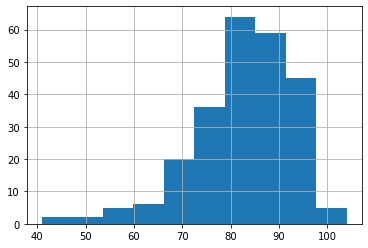

In [73]:
df_death_both['vek'].hist()

In [74]:
df_death_both.describe()

,vek
count,244.000000
mean,82.622951
std,10.455729
min,41.000000
25%,77.000000
50%,84.000000
75%,91.000000
max,104.000000


## plot

Text(0.5, 0, 'Datum')

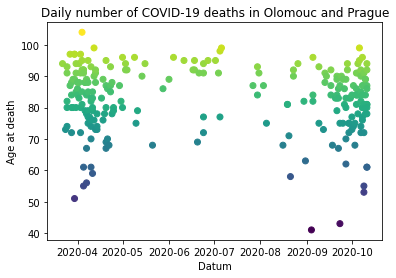

In [75]:
plt.scatter(df_death_both['datum'], df_death_both['vek'], c=df_death_both['vek'])
plt.title('Daily number of COVID-19 deaths in Olomouc and Prague')
plt.ylabel('Age at death')
plt.xlabel('Datum')

## only 75+ 

In [76]:
mask_age = df_death_both['vek'] >= 75

In [77]:
df_death_both_75 = df_death_both[mask_age].copy()

In [78]:
df_death_both_75.head()

,datum,vek,pohlavi,okres_lau_kod
0,2020-03-22,94,M,CZ0100
3,2020-03-25,91,Z,CZ0100
5,2020-03-25,82,M,CZ0100
6,2020-03-25,80,M,CZ0712
8,2020-03-25,93,Z,CZ0100


Text(0.5, 0, 'Datum')

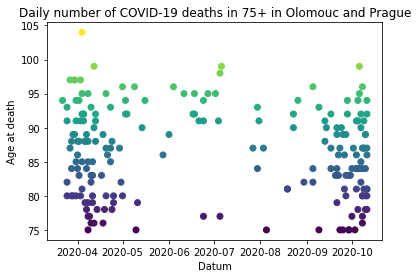

In [79]:
plt.scatter(df_death_both_75['datum'], df_death_both_75['vek'], c=df_death_both_75['vek'])
plt.title('Daily number of COVID-19 deaths in 75+ in Olomouc and Prague')
plt.ylabel('Age at death')
plt.xlabel('Datum')

In [80]:
mask_city_Prg = df_death_both_75['okres_lau_kod'] == lau_Prg
mask_city_Olo = df_death_both_75['okres_lau_kod'] == lau_Olo

In [81]:
df_death_75_Prg = df_death_both_75[mask_city_Prg].copy()
df_death_75_Prg.head()

,datum,vek,pohlavi,okres_lau_kod
0,2020-03-22,94,M,CZ0100
3,2020-03-25,91,Z,CZ0100
5,2020-03-25,82,M,CZ0100
8,2020-03-25,93,Z,CZ0100
10,2020-03-27,97,M,CZ0100


In [82]:
df_death_75_Olo = df_death_both_75[mask_city_Olo].copy()
df_death_75_Olo.tail(0)

,datum,vek,pohlavi,okres_lau_kod


In [83]:
df_death_75_Prg_grouped = df_death_75_Prg.groupby('datum', as_index=False).count()
df_death_75_Prg_grouped.head()

,datum,vek,pohlavi,okres_lau_kod
0,2020-03-22,1,1,1
1,2020-03-25,3,3,3
2,2020-03-27,2,2,2
3,2020-03-28,2,2,2
4,2020-03-29,2,2,2


In [84]:
df_death_75_Prg_grouped = df_death_75_Prg_grouped.rename(columns={'vek':'number'})
df_death_75_Prg_grouped.tail()

,datum,number,pohlavi,okres_lau_kod
76,2020-10-07,4,4,4
77,2020-10-08,7,7,7
78,2020-10-09,3,3,3
79,2020-10-10,4,4,4
80,2020-10-11,7,7,7


In [85]:
df_death_75_Prg_grouped_clean = df_death_75_Prg_grouped.drop(columns=['pohlavi', 'okres_lau_kod'])
df_death_75_Prg_grouped_clean.head()

,datum,number
0,2020-03-22,1
1,2020-03-25,3
2,2020-03-27,2
3,2020-03-28,2
4,2020-03-29,2


In [86]:
df_death_75_Olo_grouped = df_death_75_Olo.groupby('datum', as_index=False).count()
df_death_75_Olo_grouped.head()

,datum,vek,pohlavi,okres_lau_kod
0,2020-03-25,1,1,1
1,2020-03-28,1,1,1
2,2020-03-31,1,1,1
3,2020-04-02,1,1,1
4,2020-04-07,1,1,1


In [87]:
df_death_75_Olo_grouped = df_death_75_Olo_grouped.rename(columns={'vek':'number'})
df_death_75_Olo_grouped.tail()

,datum,number,pohlavi,okres_lau_kod
18,2020-10-01,1,1,1
19,2020-10-04,1,1,1
20,2020-10-09,1,1,1
21,2020-10-10,1,1,1
22,2020-10-11,1,1,1


In [88]:
df_death_75_Olo_grouped_clean = df_death_75_Olo_grouped.drop(columns=['pohlavi', 'okres_lau_kod'])
df_death_75_Olo_grouped_clean.tail()

,datum,number
18,2020-10-01,1
19,2020-10-04,1
20,2020-10-09,1
21,2020-10-10,1
22,2020-10-11,1


In [89]:
df_death_75_Olo_grouped_clean['number'].nunique()

1

## plot 

Text(0.5, 0, 'Date')

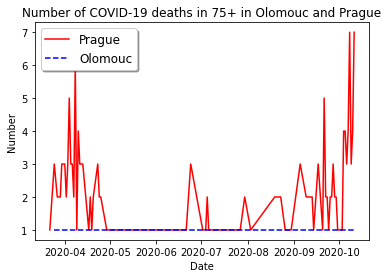

In [90]:
fig, ax = plt.subplots()
ax.plot(df_death_75_Prg_grouped_clean['datum'], df_death_75_Prg_grouped_clean['number'], 'r', label='Prague')
ax.plot(df_death_75_Olo_grouped_clean['datum'], df_death_75_Olo_grouped_clean['number'], 'b--', label='Olomouc')

legend = ax.legend(loc='upper left', shadow=True, fontsize='large')
plt.title('Number of COVID-19 deaths in 75+ in Olomouc and Prague')
plt.ylabel('Number')
plt.xlabel('Date')

## adjust by population

In [91]:
df_death_75_Prg_grouped_clean_adj = df_death_75_Prg_grouped_clean.copy()
df_death_75_Prg_grouped_clean_adj['number_adj'] = df_death_75_Prg_grouped_clean['number']/pop_Prg
df_death_75_Prg_grouped_clean_adj.head()

,datum,number,number_adj
0,2020-03-22,1,8.952047e-07
1,2020-03-25,3,2.685614e-06
2,2020-03-27,2,1.790409e-06
3,2020-03-28,2,1.790409e-06
4,2020-03-29,2,1.790409e-06


In [92]:
df_death_75_Olo_grouped_clean_adj = df_death_75_Olo_grouped_clean.copy()
df_death_75_Olo_grouped_clean_adj['number_adj'] = df_death_75_Olo_grouped_clean['number']/pop_Olo
df_death_75_Olo_grouped_clean_adj.head()

,datum,number,number_adj
0,2020-03-25,1,0.000004
1,2020-03-28,1,0.000004
2,2020-03-31,1,0.000004
3,2020-04-02,1,0.000004
4,2020-04-07,1,0.000004


## plot adjusted

Text(0.5, 0, 'Date')

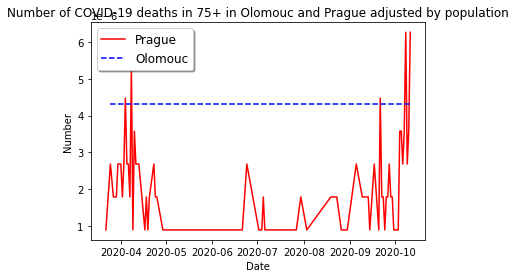

In [93]:
fig, ax = plt.subplots()
ax.plot(df_death_75_Prg_grouped_clean_adj['datum'], df_death_75_Prg_grouped_clean_adj['number_adj'], 'r', label='Prague')
ax.plot(df_death_75_Olo_grouped_clean_adj['datum'], df_death_75_Olo_grouped_clean_adj['number_adj'], 'b--', label='Olomouc')

legend = ax.legend(loc='upper left', shadow=True, fontsize='large')
plt.title('Number of COVID-19 deaths in 75+ in Olomouc and Prague adjusted by population')
plt.ylabel('Number')
plt.xlabel('Date')

## is this significant

In [94]:
print(len(df_death_75_Prg_grouped_clean_adj),len(df_death_75_Olo_grouped_clean_adj))

81 23


In [95]:
df_death_75_Prg_grouped_clean_adj = df_death_75_Prg_grouped_clean_adj.rename(columns={'number':'number_Prg', 'number_adj':'number_adjusted_Prg'})
df_death_75_Prg_grouped_clean_adj.head()

,datum,number_Prg,number_adjusted_Prg
0,2020-03-22,1,8.952047e-07
1,2020-03-25,3,2.685614e-06
2,2020-03-27,2,1.790409e-06
3,2020-03-28,2,1.790409e-06
4,2020-03-29,2,1.790409e-06


In [96]:
df_death_75_Olo_grouped_clean_adj = df_death_75_Olo_grouped_clean_adj.rename(columns={'number':'number_Olo', 'number_adj':'number_adjusted_Olo'})
df_death_75_Olo_grouped_clean_adj.head()

,datum,number_Olo,number_adjusted_Olo
0,2020-03-25,1,0.000004
1,2020-03-28,1,0.000004
2,2020-03-31,1,0.000004
3,2020-04-02,1,0.000004
4,2020-04-07,1,0.000004


In [97]:
df_merged = pd.concat([df_death_75_Prg_grouped_clean_adj, df_death_75_Olo_grouped_clean_adj], axis=1, sort=False)

df_merged.head()

,datum,number_Prg,number_adjusted_Prg,datum,number_Olo,number_adjusted_Olo
0,2020-03-22,1,8.952047e-07,2020-03-25,1.0,0.000004
1,2020-03-25,3,2.685614e-06,2020-03-28,1.0,0.000004
2,2020-03-27,2,1.790409e-06,2020-03-31,1.0,0.000004
3,2020-03-28,2,1.790409e-06,2020-04-02,1.0,0.000004
4,2020-03-29,2,1.790409e-06,2020-04-07,1.0,0.000004


In [98]:
len(df_merged)

81

In [99]:
df_merged.isnull().sum()

datum                   0
number_Prg              0
number_adjusted_Prg     0
datum                  58
number_Olo             58
number_adjusted_Olo    58
dtype: int64

In [100]:
df_merged.corr()

,number_Prg,number_adjusted_Prg,number_Olo,number_adjusted_Olo
number_Prg,1.000000e+00,1.000000e+00,NaN,1.767324e-16
number_adjusted_Prg,1.000000e+00,1.000000e+00,NaN,-2.139495e-16
number_Olo,NaN,NaN,NaN,NaN
number_adjusted_Olo,1.767324e-16,-2.139495e-16,NaN,1.000000e+00


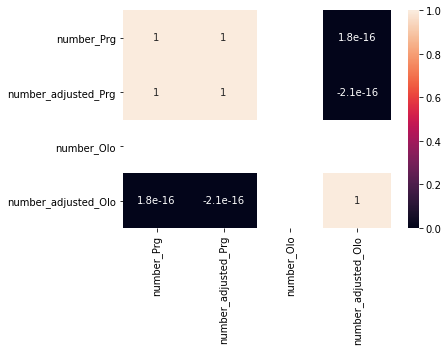

In [101]:
import seaborn as sn
corrMatrix = df_merged.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [102]:
df_merged_clean = df_merged[['number_adjusted_Prg', 'number_adjusted_Olo']]
df_merged_clean.head(10)

,number_adjusted_Prg,number_adjusted_Olo
0,8.952047e-07,0.000004
1,2.685614e-06,0.000004
2,1.790409e-06,0.000004
3,1.790409e-06,0.000004
4,1.790409e-06,0.000004
5,2.685614e-06,0.000004
6,2.685614e-06,0.000004
7,2.685614e-06,0.000004
8,1.790409e-06,0.000004
9,2.685614e-06,0.000004


In [103]:
df_merged_clean.corr()

,number_adjusted_Prg,number_adjusted_Olo
number_adjusted_Prg,1.000000e+00,-2.139495e-16
number_adjusted_Olo,-2.139495e-16,1.000000e+00


In [104]:
df_merged_clean.isnull().sum()

number_adjusted_Prg     0
number_adjusted_Olo    58
dtype: int64

In [105]:
#drop lines with null values
df_merged_clean = df_merged_clean.dropna()
df_merged_clean.head(10)

,number_adjusted_Prg,number_adjusted_Olo
0,8.952047e-07,0.000004
1,2.685614e-06,0.000004
2,1.790409e-06,0.000004
3,1.790409e-06,0.000004
4,1.790409e-06,0.000004
5,2.685614e-06,0.000004
6,2.685614e-06,0.000004
7,2.685614e-06,0.000004
8,1.790409e-06,0.000004
9,2.685614e-06,0.000004


In [106]:
import scipy.stats as stats
stats.pearsonr(df_merged_clean['number_adjusted_Prg'], df_merged_clean['number_adjusted_Olo'])

C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


(nan, nan)